In [1]:
import numpy as np
import matplotlib.pyplot as plt


##########Initialize
##Initialize parameters: p,q (possibility curve), r,s(indifference curve),sigma (std dev)
p = 2; q = 2; r = 1/2; s = 1/2; sigma = 0.04


def fn(p =2, q=2, r=0.5, s=0.5, sigma = 0.04, N=250, T=50, prob_l = 0.02, ecu_mean_init=0.6, evu_mean_init=0.8):

    ##ecu: economic utility, evu: environmental utility
    #INitialize population mean (ecu, evu)
    ##mean will lie somewhere ont he indifference curve
    
    #Initialize (ecu,evu) values for population (2 x N array)
    #mean of ecu is in first row, mean of evu is in 2nd row
    pop_ecu_evu = np.zeros((2, N))
    
    
    ##Populate pop_ecu_evu with values that are normally distributed
    pop_ecu_evu[0,:] = ecu_mean_init + sigma * np.random.normal(size = N) ##ecu row
    pop_ecu_evu[1,:] = evu_mean_init + sigma * np.random.normal(size = N) #evu row
    
    
    #Ensure that the random population values generated are between '0' and '1'.
    pop_ecu_evu = np.maximum(pop_ecu_evu, 0)
    pop_ecu_evu = np.minimum(pop_ecu_evu, 1)
    
    pop_init = np.copy(pop_ecu_evu) ###Store initial population
    
    ##Create a vector to store the population mean (ecu, evu) over time(2 X T array)
    pop_mean = np.zeros((2,T))
    
    ##Initialize choice vector 2 x 1 vector
    choice = np.zeros((2,1))
    market_mean = np.zeros(2)
    
    #Initialize mean_utility vector
    mean_utility = np.zeros(T)
     
    for t in range (T):
        pop_mean[:,t] = np.mean(pop_ecu_evu, axis = 1)
        market_mean[0] = np.maximum(pop_mean[0,t],0)  #Ensure that mean doesn't fall below zero ###market ECU since market only cares 
        #about ecu. After calculate EVU from MARKET ECU. MARKET ECU = Population mean
        market_mean[0] = np.minimum(market_mean[0], 1) #Ensure mean doesn't exceed one
        market_mean[1] = (1 - (market_mean[0])**p) ** (1/q)
    
        #Generate new choice
        choice[0,0] = max(market_mean[0] + sigma*np.random.normal(size = 1), 0.0)
        choice[1,0] = max(market_mean[1] + sigma*np.random.normal(size = 1),0)

        person = np.random.randint(N, size = 1) #Choose a random person/AGENT from popn at time t
        rand_val = np.random.random_sample((1,))  #Aiming to simulate whether or not the agent will leave the system
        
        
        #UTILITY OF CHOICE
        choice_utility = choice[0,0]**r + choice[1,0]**s
        #UTILITY OF PERSON
        person_utility = pop_ecu_evu[0,person]**r + pop_ecu_evu[1,person]**s
        
        if rand_val < prob_l:       #Agent leaves system
            #Update the population mean  
            pop_ecu_evu[:,person] = choice #Choice must be accepted by new agent
            
        else:
            if choice_utility > person_utility:
                pop_ecu_evu[:, person] = choice #Update the population mean  
                
        #After pop_ecu_evu update calculate mean utility
        mean_utility[t] = pop_mean[0,t]**r + pop_mean[1,t]**s  
        
    return pop_mean, pop_ecu_evu, pop_init, mean_utility
                
            
plt.figure(1)
t = 50000
val = fn(T = t) #T = t, N = 50
pop_mean = val[0]   ###ECU VALUES
pop_ecu_evu = val[1]  ###EVU VALUES
pop_init = val[2]
mean_utility = val[3]

plt.plot(range(t), pop_mean[0], label = 'mean ecu')
plt.plot(range(t), pop_mean[1], label = 'mean evu')
plt.xlabel('time')
plt.ylabel('average mean')
plt.legend()


                
            
            

Text(0, 0.5, 'evu')

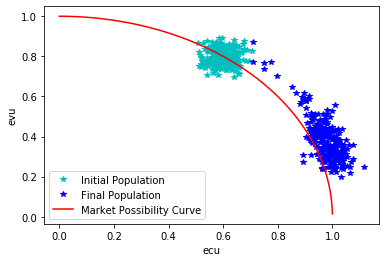

In [2]:
plt.figure(2)
###PLOT MARKET POSSIBILITY CURVE
x_poss_cur = np.arange(0,1,0.0001)
y_poss_cur = (1 - x_poss_cur**p)**(1/q)


plt.plot(pop_init[0],pop_init[1], 'c*', label = 'Initial Population')
plt.plot(pop_ecu_evu[0],pop_ecu_evu[1], 'b*', label = 'Final Population')
plt.plot(x_poss_cur, y_poss_cur, 'r', label = 'Market Possibility Curve')
plt.legend()
plt.xlabel('ecu')
plt.ylabel('evu')
#
#


[   0.   16. 7361. 8388. 8834.] 



//anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
//anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


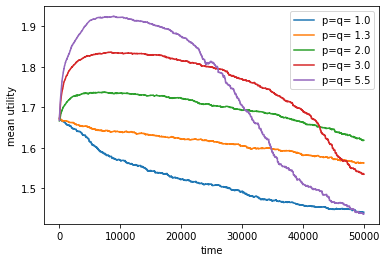

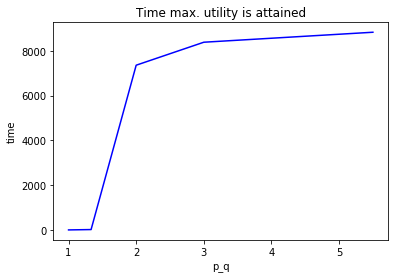

In [3]:
#####MEAN UTILITY OF THE POPULATION WITH DIFFERENT POPULATION
##Part a)	As a function of p,q (p and q are equal) (p=q=1, 4/3, 2, 3, 5.5)
plt.figure(3)
p_q_array = np.array([1, 4/3, 2, 3, 5.5])

maxTime = np.array([])



for p_q in p_q_array:
    mean_utility = fn(p = p_q, q = p_q, T = t)[3]
    time = np.argmax(mean_utility)
    
    maxTime = np.append(maxTime, time)

    
    plt.plot(range(t), mean_utility, label = 'p=q= {:0.1f}'.format(p_q)) #
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('mean utility')
    
    
plt.figure(4)
plt.plot(p_q_array, maxTime, 'b-')
plt.xlabel('p_q')
plt.ylabel('time')
plt.title('Time max. utility is attained')


print(maxTime, "\n")




As p_q increases the mean utility increases until a maximum is attained, plateus then decreases. The time to attain max mean utility also increases.

maxTime: [7077. 7217. 7508. 7207. 7450.] 



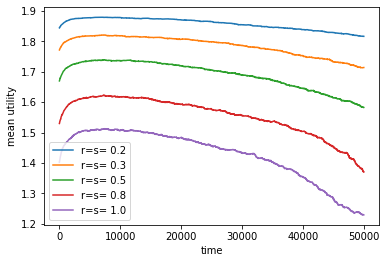

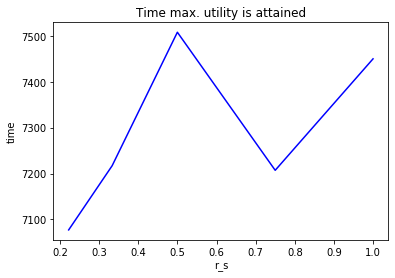

In [4]:
#Pat b)	As a function of r,s (r and s are equal) (r =s= 1, 3/4, 1/2, 1/3, 2/9)
plt.figure(5)
# r_s_array = np.array([1, 3/4, 1/2, 1/3, 2/9])
r_s_array = np.array([2/9, 1/3, 1/2, 3/4, 1])

maxTime = np.array([])


for r_s in r_s_array:
    mean_utility = fn(r = r_s, s = r_s, T = t)[3]
    
    time = np.argmax(mean_utility)
    
    maxTime = np.append(maxTime, time)
    
    plt.plot(range(t), mean_utility, label = 'r=s= {:0.1f}'.format(r_s))
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('mean utility')
    
plt.figure(6)
plt.plot(r_s_array, maxTime, 'b-')
plt.xlabel('r_s')
plt.ylabel('time')
plt.title('Time max. utility is attained')


print("maxTime:", maxTime, "\n")




Here as r_s increase the mean utility decreases ceteris paribus. However, as r_s increases, the time to reach max utility fluctuates.

maxTime: [13444. 10757.  7011.  3997.  3528.] 



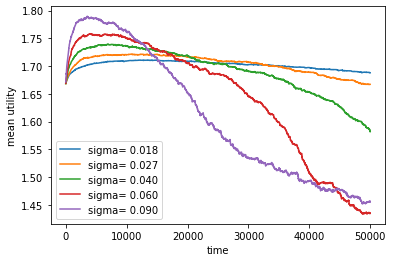

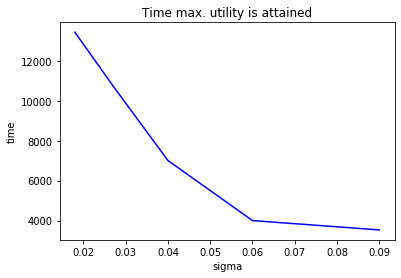

In [5]:
#Partc)	As a function  of sigma (sigma = .018, .027, 0.04, 0.06,0.09)
plt.figure(7)
sigma_array = np.array([.018, .027, 0.04, 0.06,0.09])

maxTime = np.array([])

for sig in sigma_array:
    mean_utility = fn(sigma = sig, T = t)[3]
    
    time = np.argmax(mean_utility)
    
    maxTime = np.append(maxTime, time)
    
    plt.plot(range(t), mean_utility, label = 'sigma= {:0.3f}'.format(sig)) #
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('mean utility')
    
plt.figure(8)
plt.plot(sigma_array, maxTime, 'b-')
plt.xlabel('sigma')
plt.ylabel('time')
plt.title('Time max. utility is attained')



print("maxTime:", maxTime, "\n")






As sigma increases, the mean utility increases, plateus then decreases. Also, as sigma increases the time it takes to attain maximum utility decreases.

maxTime: [13453. 10150.  7899.  7858.  6697.] 



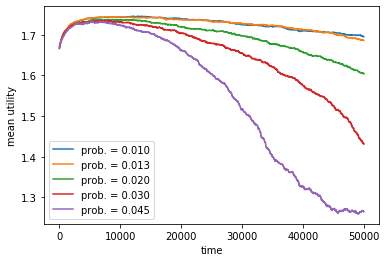

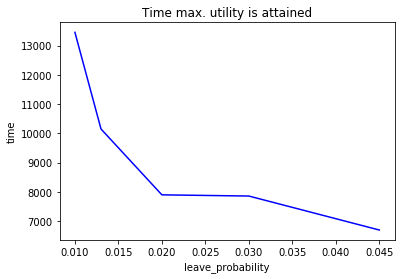

In [6]:
#Part d)	As a function of leave probability (p_l = 0.01, 0.013, 0.02,0.03,0.045)
plt.figure(9)
leave_prob_array = np.array([0.01, 0.013, 0.02,0.03,0.045])

maxTime = np.array([])

for prob in leave_prob_array:
    mean_utility = fn(prob_l = prob, T = t)[3]
    
    time = np.argmax(mean_utility)
    
    maxTime = np.append(maxTime, time)
    
    plt.plot(range(t), mean_utility, label = 'prob. = {:0.3f}'.format(prob)) #
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('mean utility')
    
    
plt.figure(10)
plt.plot(leave_prob_array, maxTime, 'b-')
plt.xlabel('leave_probability')
plt.ylabel('time')
plt.title('Time max. utility is attained')




print("maxTime:", maxTime, "\n")







Here as the probability of leaving increases the mean utility tends to decrease; the time to attain max. utility also decreases.